### importing all Liabrary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

In [2]:
# Read the csv file and create Data Frame 
df=pd.read_excel(r'Privacy_Peserving.xlsx')


### EDA

In [3]:
# view the top 5 rows
df.head()

,activity_description,label
0,Watching Khan Academy math tutorial,Utilizing Time for Knowledge Development
1,Reviewing course lecture slides,Utilizing Time for Knowledge Development
2,Playing a video game,Wasting Time
3,Watching TV shows,Wasting Time
4,Taking notes from a lecture video,Utilizing Time for Knowledge Development


In [4]:
# view the last 5 rows
df.tail()

,activity_description,label
4996,Writing an essay for a class assignment,Utilizing Time for Knowledge Development
4997,Scrolling through social media feeds,Wasting Time
4998,Chatting with friends on messaging apps,Wasting Time
4999,Writing an essay for a class assignment,Utilizing Time for Knowledge Development
5000,Scrolling through social media feeds,Wasting Time


In [5]:
# Cheking the Information of each columns like Data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   activity_description  5001 non-null   object
 1   label                 4715 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [6]:
# Cheking the null value in dataset
df.isna().sum()

activity_description      0
label                   286
dtype: int64

In [7]:
# Cheking the Data Set shape (Rows, columns)
df.shape

(5001, 2)

In [8]:
# cheking columns name in data set
df.columns

Index(['activity_description', 'label'], dtype='object')

In [9]:
# cheking types of data present in specific columns 
df['label'].value_counts().to_dict()

{'Wasting Time': 2392, 'Utilizing Time for Knowledge Development': 2323}

In [10]:
# Replace that Categorical data into integer data.
df['label'].replace({'Utilizing Time for Knowledge Development': 0, 'Wasting Time': 1},inplace=True)

In [11]:
# cheking types of data present in specific columns 
df['activity_description'].value_counts().to_dict()

{'Playing a video game': 692,
 'Taking notes from a lecture video': 629,
 'Writing an essay for a class assignment': 583,
 'Watching cat videos on YouTube': 359,
 'Coding a personal project': 342,
 'Watching TV shows': 287,
 'Checking email': 287,
 'Playing online crossword puzzles': 287,
 'Online shopping': 286,
 'Reading a scientific research paper': 286,
 'Scrolling through social media feeds': 241,
 'Solving programming exercises': 240,
 'Participating in an online quiz': 240,
 'Chatting with friends on messaging apps': 240,
 'Watching Khan Academy math tutorial': 1,
 'Reviewing course lecture slides': 1}

In [12]:
def text_clean(Text): 
            # changing to lower case
            lower = Text.str.lower()
            # Replacing the repeating pattern of &#039;
            pattern_remove = lower.str.replace("&#039;", "")
            # Removing all the special Characters
            special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
            # Removing all the non ASCII characters
            ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')    
            # Removing the leading and trailing Whitespaces
            whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')    
            # Replacing multiple Spaces with Single Space
            multiw_remove = whitespace_remove.str.replace(r'\s+',' ') 
            # Replacing Two or more dots with one
            dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
            return dataframe

df["Cleaned_Text"] = text_clean(df["activity_description"])

In [13]:
from sklearn.feature_extraction.text import HashingVectorizer

### Hashing vectorizer
hv = HashingVectorizer(n_features=500)
# vector = hv.transform(df["Cleaned_Text"])

a = hv.fit_transform(df['activity_description']).toarray()

### Splitting the Data

In [14]:
x=pd.DataFrame(a)
y=df['label']

In [15]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [22]:
y.fillna(y.mode()[0], inplace=True)

In [53]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3749, 500), (1607, 500), (3749,), (1607,))

### Model Training

### Decision Tree  

In [84]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(ccp_alpha=0.0012)
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_train)
acc_dt_train = accuracy_score(y_train,y_pred)
print(f'accuracy_dt = ',acc_dt_train)

accuracy_dt =  0.9997332622032542


In [85]:
### Traning accuracy for DT
y_pred=model_dt.predict(x_train)
acc_dt_train = accuracy_score(y_train,y_pred)
RS_dt_train = recall_score(y_train,y_pred)
PS_dt_train = precision_score(y_train,y_pred)
F1S_dt_train = f1_score(y_train,y_pred)
CM_dt_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_dt = ',acc_dt_train)
print(f'Recall = ',RS_dt_train)
print(f'Precision = ',PS_dt_train)
print(f'F1-score = ',F1S_dt_train)
print(f'Condusion-Metrics = \n',CM_dt_train)

accuracy_dt =  0.9997332622032542
Recall =  1.0
Precision =  0.9994666666666666
F1-score =  0.9997332622032541
Condusion-Metrics = 
 [[1874    1]
 [   0 1874]]


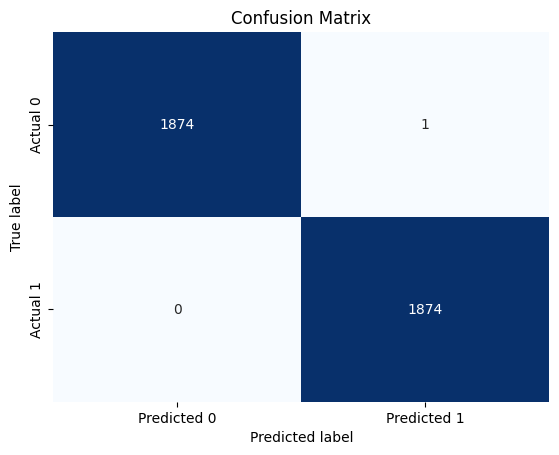

In [86]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_dt_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [87]:
### Testing accuracy for DT
y_pred_test=model_dt.predict(x_test)
acc_dt_test = accuracy_score(y_test,y_pred_test)
RS_dt_test = recall_score(y_test,y_pred_test)
PS_dt_test = precision_score(y_test,y_pred_test)
F1S_dt_test = f1_score(y_test,y_pred_test)
CM_dt_test = confusion_matrix(y_test,y_pred_test)
print(f'accuracy_dt = ',acc_dt_test)
print(f'Recall = ',RS_dt_test)
print(f'Precision = ',PS_dt_test)
print(f'F1-score = ',F1S_dt_test)

accuracy_dt =  1.0
Recall =  1.0
Precision =  1.0
F1-score =  1.0


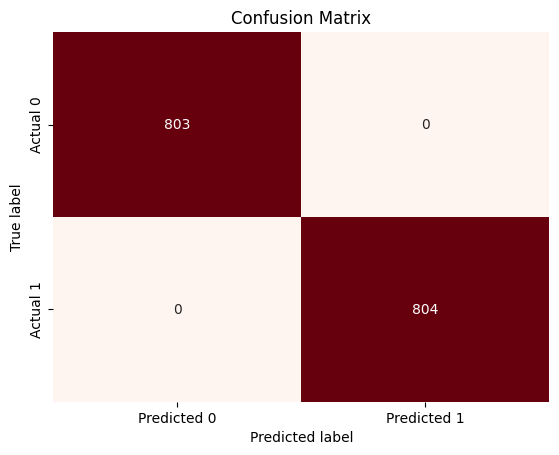

In [88]:
# Plot the confusion matrix using Seaborn for testing Data
sns.heatmap(CM_dt_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(ccp_alpha=0.0012)

# Initialize RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_dtree = grid_search.best_estimator_
test_accuracy = best_dtree.score(x_test, y_test)
print("Test accuracy:", test_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}
Test accuracy: 1.0


In [30]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(x_train,y_train)
y_pred=model_gnb.predict(x_train)
acc_gnb_train = accuracy_score(y_train,y_pred)
acc_gnb_train

1.0

In [31]:
### Traning accuracy for DT
y_pred=model_dt.predict(x_train)
acc_dt_train = accuracy_score(y_train,y_pred)
RS_dt_train = recall_score(y_train,y_pred)
PS_dt_train = precision_score(y_train,y_pred)
F1S_dt_train = f1_score(y_train,y_pred)
CM_dt_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_dt = ',acc_dt_train)
print(f'Recall = ',RS_dt_train)
print(f'Precision = ',PS_dt_train)
print(f'F1-score = ',F1S_dt_train)
print(f'Condusion-Metrics = \n',CM_dt_train)

accuracy_dt =  0.5354285714285715
Recall =  1.0
Precision =  0.5354285714285715
F1-score =  0.6974320803870487
Condusion-Metrics = 
 [[   0 1626]
 [   0 1874]]


### CNN

In [32]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Build a simple fully connected neural network model
model_cnn = Sequential()
model_cnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_train, y_train)
print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}')

Epoch 1/10


110/110 [==============================] - 4s 9ms/step - loss: 0.1715 - accuracy: 0.9786 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
110/110 [==============================] - 1s 6ms/step - loss: 9.7965e-04 - accuracy: 1.0000 - val_loss: 6.2376e-04 - val_accuracy: 1.0000
Epoch 4/10
110/110 [==============================] - 1s 6ms/step - loss: 4.6812e-04 - accuracy: 1.0000 - val_loss: 3.4366e-04 - val_accuracy: 1.0000
Epoch 5/10
110/110 [==============================] - 0s 4ms/step - loss: 2.7752e-04 - accuracy: 1.0000 - val_loss: 2.1949e-04 - val_accuracy: 1.0000
Epoch 6/10
110/110 [==============================] - 0s 4ms/step - loss: 1.8452e-04 - accuracy: 1.0000 - val_loss: 1.5218e-04 - val_accuracy: 1.0000
Epoch 7/10
110/110 [==============================] - 0s 4ms/step - loss: 1.3133e-04 - accuracy: 1.0000 - val_loss: 1.1124e-04 

In [33]:
### Traning accuracy for CNN
y_pred=model_cnn.predict(X_train)
# Assuming y_train and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate classification metrics
acc_cnn_train = accuracy_score(y_train,y_pred_binary)
RS_cnn_train = recall_score(y_train,y_pred_binary)
PS_cnn_train = precision_score(y_train,y_pred_binary)
F1S_cnn_train = f1_score(y_train,y_pred_binary)
CM_cnn_train = confusion_matrix(y_train,y_pred_binary)
print(f'accuracy_CNN = ',acc_cnn_train)
print(f'Recall = ',RS_cnn_train)
print(f'Precision = ',PS_cnn_train)
print(f'F1-score = ',F1S_cnn_train)
print(f'Condusion-Metrics = \n',CM_cnn_train)


110/110 [==============================] - 0s 2ms/step
accuracy_CNN =  1.0
Recall =  1.0
Precision =  1.0
F1-score =  1.0
Condusion-Metrics = 
 [[1626    0]
 [   0 1874]]


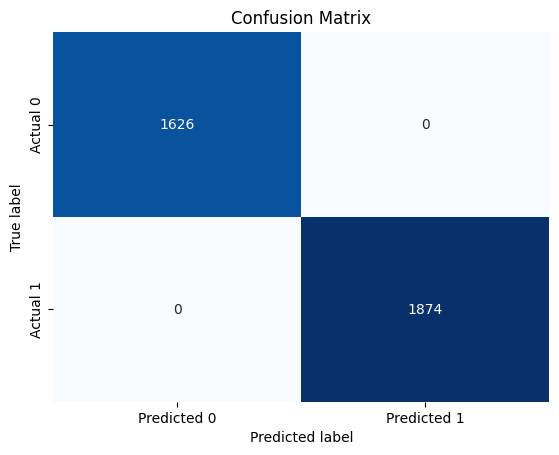

In [34]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_cnn_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [35]:
with open('CNN_model.pkl','wb') as fp:
    pickle.dump(model_cnn,fp)

In [36]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Build a simple fully connected neural network model
model_cnn = Sequential()
model_cnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
110/110 [==============================] - 2s 6ms/step - loss: 0.1526 - accuracy: 0.9903 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2/10
110/110 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/10
110/110 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.6587e-04 - val_accuracy: 1.0000
Epoch 4/10
110/110 [==============================] - 0s 4ms/step - loss: 5.0646e-04 - accuracy: 1.0000 - val_loss: 3.7253e-04 - val_accuracy: 1.0000
Epoch 5/10
110/110 [==============================] - 0s 4ms/step - loss: 3.0251e-04 - accuracy: 1.0000 - val_loss: 2.3771e-04 - val_accuracy: 1.0000
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 1.9977e-04 - accuracy: 1.0000 - val_loss: 1.6304e-04 - val_accuracy: 1.0000
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 1.4148e-04 - accuracy: 1.0000 - val_loss: 1.19

In [37]:
### Testing accuracy for CNN
y_pred_test=model_cnn.predict(X_test)
# Assuming y_test and y_pred are continuous values
threshold = 0.5
y_pred_binary = (y_pred_test > threshold).astype(int)

# Calculate classification metrics
acc_cnn_test = accuracy_score(y_test,y_pred_binary)
RS_cnn_test = recall_score(y_test,y_pred_binary)
PS_cnn_test = precision_score(y_test,y_pred_binary)
F1S_cnn_test = f1_score(y_test,y_pred_binary)
CM_cnn_test = confusion_matrix(y_test,y_pred_binary)
print(f'accuracy_CNN = ',acc_cnn_test)
print(f'Recall = ',RS_cnn_test)
print(f'Precision = ',PS_cnn_test)
print(f'F1-score = ',F1S_cnn_test)
print(f'Condusion-Metrics = \n',CM_cnn_test)

47/47 [==============================] - 0s 2ms/step
accuracy_CNN =  1.0
Recall =  1.0
Precision =  1.0
F1-score =  1.0
Condusion-Metrics = 
 [[697   0]
 [  0 804]]


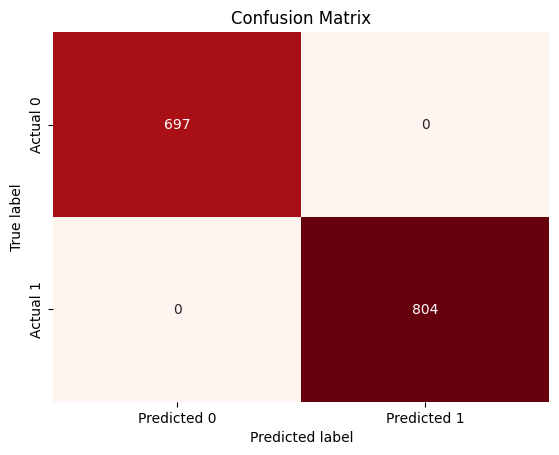

In [38]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_cnn_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Linear Discriminant Analysis [LDA]

In [39]:
model_lda=LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [40]:
# Claclulate Y_pred
y_pred=model_lda.predict(x_train)
print(y_pred)

# Calculate classification metrics
acc_lda_train = accuracy_score(y_train,y_pred)
RS_lda_train = recall_score(y_train,y_pred)
PS_lda_train = precision_score(y_train,y_pred)
F1S_lda_train = f1_score(y_train,y_pred)
CM_lda_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_lda = ',acc_lda_train)
print(f'Recall = ',RS_lda_train)
print(f'Precision = ',PS_lda_train)
print(f'F1-score = ',F1S_lda_train)
print(f'Condusion-Metrics = \n',CM_lda_train)

[0. 0. 1. ... 0. 1. 1.]
accuracy_lda =  0.7105714285714285
Recall =  0.7844183564567769
Precision =  0.7070707070707071
F1-score =  0.7437389324563622
Condusion-Metrics = 
 [[1017  609]
 [ 404 1470]]


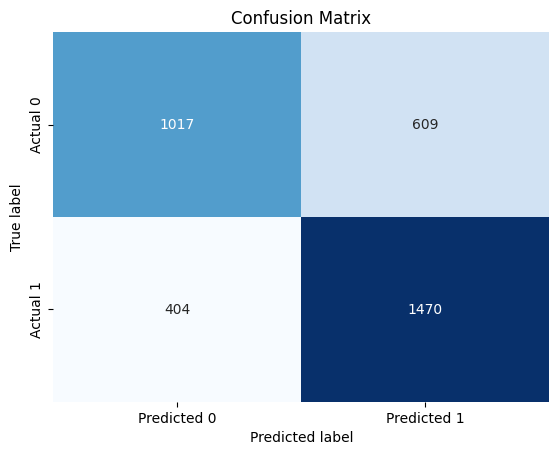

In [41]:
# Plot the confusion matrix using Seaborn for Training Data
sns.heatmap(CM_lda_train, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [42]:
### Testing accuracy for LDA

# Calculate y_pred
y_pred_test=model_lda.predict(x_test)
print(y_pred_test)

# Calculate classification metrics
acc_lda_test = accuracy_score(y_test,y_pred_test)
RS_lda_test = recall_score(y_test,y_pred_test)
PS_lda_test = precision_score(y_test,y_pred_test)
F1S_lda_test = f1_score(y_test,y_pred_test)
CM_lda_test = confusion_matrix(y_test,y_pred_test)
print(f'accuracy_lda = ',acc_lda_test)
print(f'Recall = ',RS_lda_test)
print(f'Precision = ',PS_lda_test)
print(f'F1-score = ',F1S_lda_test)

[1. 1. 1. ... 0. 1. 0.]
accuracy_lda =  0.7135243171219188
Recall =  0.7898009950248757
Precision =  0.7087053571428571
F1-score =  0.7470588235294119


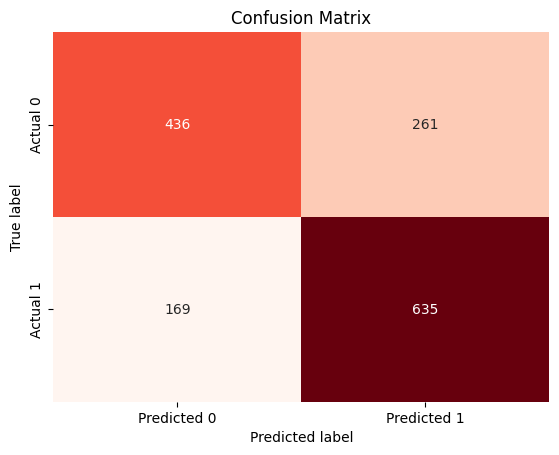

In [43]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_lda_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### **Navie Bayes**

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [45]:
### Traning accuracy for DT
y_pred=gnb.predict(x_train)
acc_gnb_train = accuracy_score(y_train,y_pred)
RS_gnb_train = recall_score(y_train,y_pred)
PS_gnb_train = precision_score(y_train,y_pred)
F1S_gnb_train = f1_score(y_train,y_pred)
CM_gnb_train = confusion_matrix(y_train,y_pred)
print(f'accuracy_gnb = ',acc_gnb_train)
print(f'Recall = ',RS_gnb_train)
print(f'Precision = ',PS_gnb_train)
print(f'F1-score = ',F1S_gnb_train)
print(f'Condusion-Metrics = \n',CM_gnb_train)

accuracy_gnb =  1.0
Recall =  1.0
Precision =  1.0
F1-score =  1.0
Condusion-Metrics = 
 [[1626    0]
 [   0 1874]]


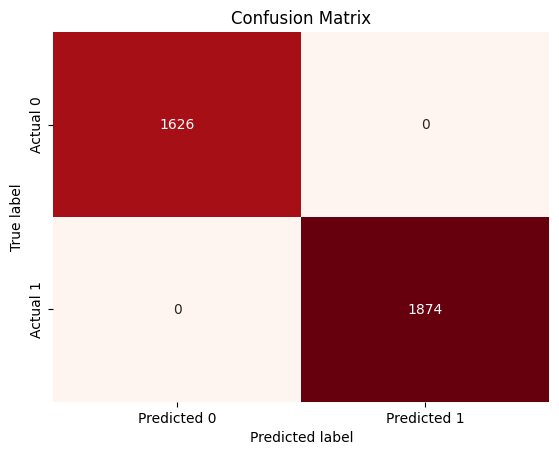

In [46]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_gnb_train, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [47]:
### Testing accuracy for DT
y_pred_test=gnb.predict(x_test)
acc_gnb_test = accuracy_score(y_test,y_pred_test)
RS_gnb_test = recall_score(y_test,y_pred_test)
PS_gnb_test = precision_score(y_test,y_pred_test)
F1S_gnb_test = f1_score(y_test,y_pred_test)
CM_gnb_test = confusion_matrix(y_test,y_pred_test)
print(f'accuracy_dt = ',acc_gnb_test)
print(f'Recall = ',RS_gnb_test)
print(f'Precision = ',PS_gnb_test)
print(f'F1-score = ',F1S_gnb_test)

accuracy_dt =  1.0
Recall =  1.0
Precision =  1.0
F1-score =  1.0


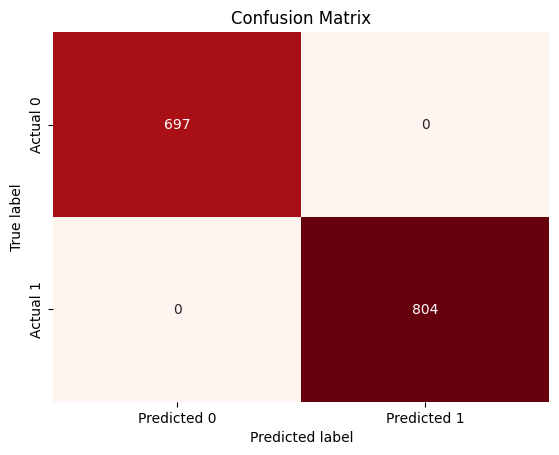

In [48]:
# Plot the confusion matrix using Seaborn for Testing Data
sns.heatmap(CM_gnb_test, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [49]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_train)
acc = accuracy_score(y_train, y_pred)
acc

1.0

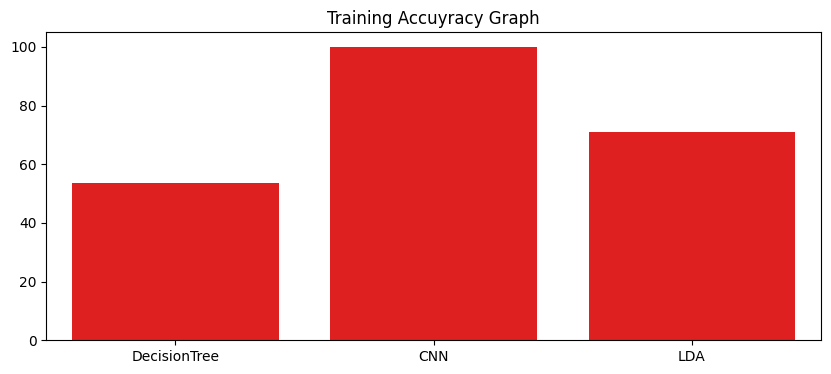

In [50]:
algorithum=["DecisionTree","CNN","LDA"]
accuracy= [acc_dt_train*100,acc_cnn_train*100,acc_lda_train*100]
plt.figure(figsize=(10,4))
sns.barplot(x=algorithum,y=accuracy,color='red')
plt.title("Training Accuyracy Graph")
plt.show()


### **Prediction**

In [51]:
inp = "he is playing game continusly"

def text_clean(Text): 
    # changing to lower case
    lower = Text.lower()
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.replace("&#039;", "")
    # Removing all the special Characters
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')
    # Removing all the non ASCII characters
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.replace(r'\s+',' ') 
    # Replacing Two or more dots with one
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')
    return dataframe
inp = text_clean(inp)
print(inp)
hv = HashingVectorizer(n_features=500)
inp1 = hv.fit_transform([inp]).toarray()
res = model_cnn.predict(inp1)
print(res)

he is playing game continusly
1/1 [==============================] - 0s 47ms/step
[[0.760749]]


In [52]:
inp = "Reading the books"

def text_clean(Text): 
    # changing to lower case
    lower = Text.lower()
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.replace("&#039;", "")
    # Removing all the special Characters
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')
    # Removing all the non ASCII characters
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.replace(r'\s+',' ') 
    # Replacing Two or more dots with one
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')
    return dataframe
inp = text_clean(inp)
print(inp)
hv = HashingVectorizer(n_features=500)
inp1 = hv.fit_transform([inp]).toarray()
res = model_cnn.predict(inp1)
print(res)

reading the books
1/1 [==============================] - 0s 46ms/step
[[0.6150471]]
